In [1]:
import numpy as np
from dataset import CustomDataset

DATASET_FOLDER = "./data/train"
ds = CustomDataset(DATASET_FOLDER)

loaded Dataset with 295 images, 85 of which are high grade. Average age: 68


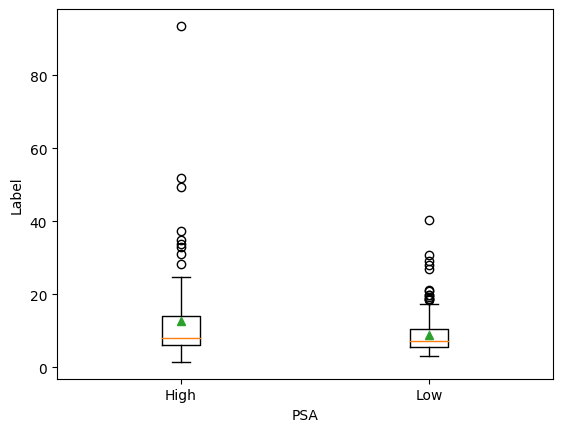

In [9]:
dataset = ds
psas = [dataset.metadata[i].prostate_specific_antigen_level for i in range(len(dataset))]
labels = dataset.labels

import matplotlib.pyplot as plt
high = [psas[i] for i in range(len(labels)) if ds.labels[i] == 1]
low = [psas[i] for i in range(len(labels)) if ds.labels[i] == 0]
# make box plot
plt.boxplot([high, low], labels=["High", "Low"], showmeans=True)
plt.xlabel("PSA")
plt.ylabel("Label")
plt.show()

In [3]:
# Get the maximum z dimension for images. Need to pad them to this size

shapes = []
for image in ds.images:
    shapes.append(image.shape)
shapes = np.stack(shapes)
padded_shape = np.max(shapes, axis=0)

In [ ]:
# Check if data is already normalized, which seems to be the case

means, stds, mins, maxs = [], [], [], []
for data in ds.image_data:
    means.append(np.mean(data))
    stds.append(np.std(data))
    mins.append(np.min(data))
    maxs.append(np.max(data))

means = np.stack(means)
stds = np.stack(stds)
mins = np.stack(mins)
maxs = np.stack(maxs)

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.plot(means)
plt.title("Mean")
plt.subplot(2, 2, 2)
plt.plot(stds)
plt.title("Std")
plt.subplot(2, 2, 3)
plt.plot(mins)
plt.title("Min")
plt.subplot(2, 2, 4)
plt.plot(maxs)
plt.title("Max")
plt.show()